In [0]:
import pandas as pd
import matplotlib.pyplot as plt

# Load Spark table written in 01_ingest_clean_write_delta.py
df_spark = spark.table("madsc102.usaccidents_volume")

print("Spark rows:", df_spark.count())

# Convert to Pandas for Kaggle-style visualizations
df_USA = df_spark.toPandas()

print("Pandas rows:", len(df_USA))
df_USA.head()


Spark rows: 7061773
Pandas rows: 7061773


,ID,start_time,start_date,start_hour,duration_minutes,severity,city,state,latitude,longitude,distance_miles,is_weekend
0,3091597,2018-01-29 06:35:20,2018-01-29,6,2.528680e+07,3,Highland Park,MI,42.418091,-83.087936,0.0,False
1,3091598,2018-01-29 06:34:05,2018-01-29,6,2.528679e+07,2,Fenton,MI,42.863033,-83.739975,0.0,False
2,3091599,2018-01-29 06:37:06,2018-01-29,6,2.528680e+07,3,Grand Blanc,MI,42.895668,-83.632477,0.0,False
3,3091600,2018-01-29 06:43:04,2018-01-29,6,2.528680e+07,3,Grass Lake,MI,42.291252,-84.204346,0.0,False
4,3091601,2018-01-29 06:46:57,2018-01-29,6,2.528681e+07,2,Flint,MI,42.988998,-83.732826,0.0,False


In [0]:
categorical_cols_of_interest = [
    "city", "state", "start_hour", "is_weekend",
    "severity",  # included for distribution check
    # Add more if needed depending on ingestion
]

print("Columns available:", df_USA.columns.tolist())


Columns available: ['ID', 'start_time', 'start_date', 'start_hour', 'duration_minutes', 'severity', 'city', 'state', 'latitude', 'longitude', 'distance_miles', 'is_weekend']



Percentage Distribution of Severity for Categorical Variables:


--- city ---
         city  severity  Count  Percentage
0  Aaronsburg         2     18    0.000255
1  Aaronsburg         3      2    0.000028
2   Abbeville         1      4    0.000057
3   Abbeville         2    549    0.007774
4   Abbeville         3      1    0.000014


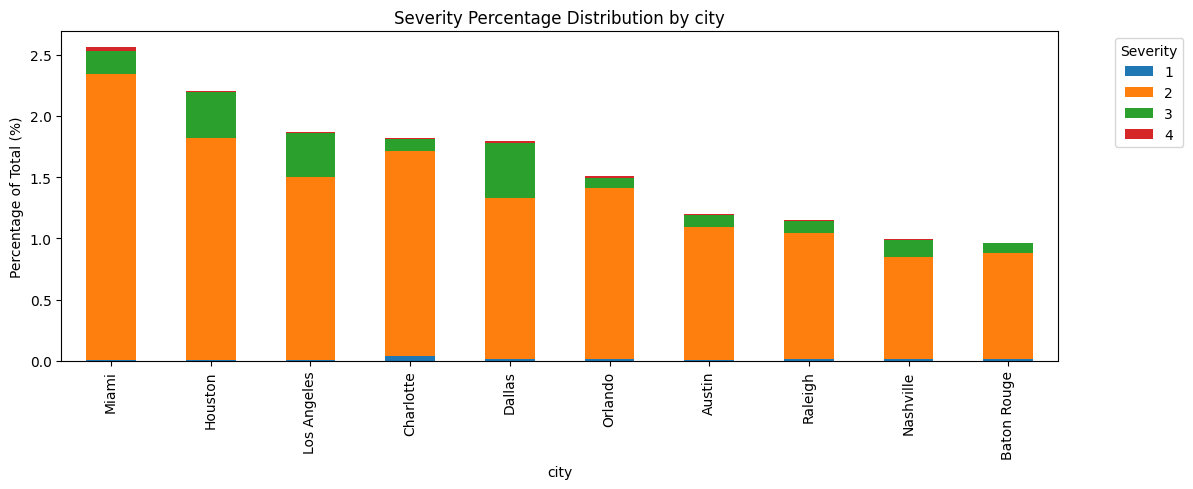


--- state ---
  state  severity  Count  Percentage
0    AL         1    658    0.009318
1    AL         2  72364    1.024728
2    AL         3  19547    0.276800
3    AL         4   1681    0.023804
4    AR         1     37    0.000524


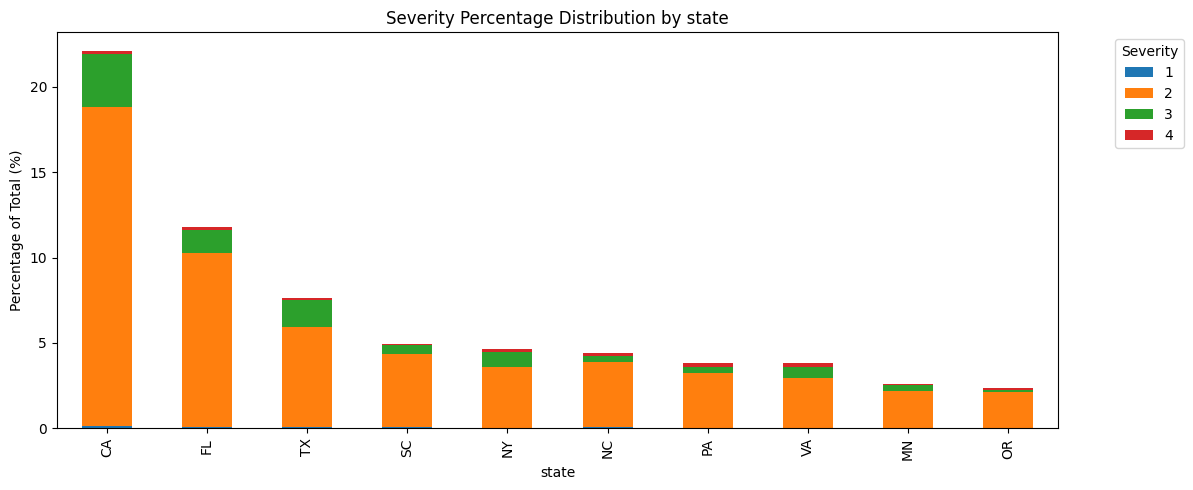


--- start_hour ---
   start_hour  severity  Count  Percentage
0           0         1    369    0.005225
1           0         2  86692    1.227624
2           0         3   8157    0.115509
3           0         4   6045    0.085602
4           1         1    252    0.003569


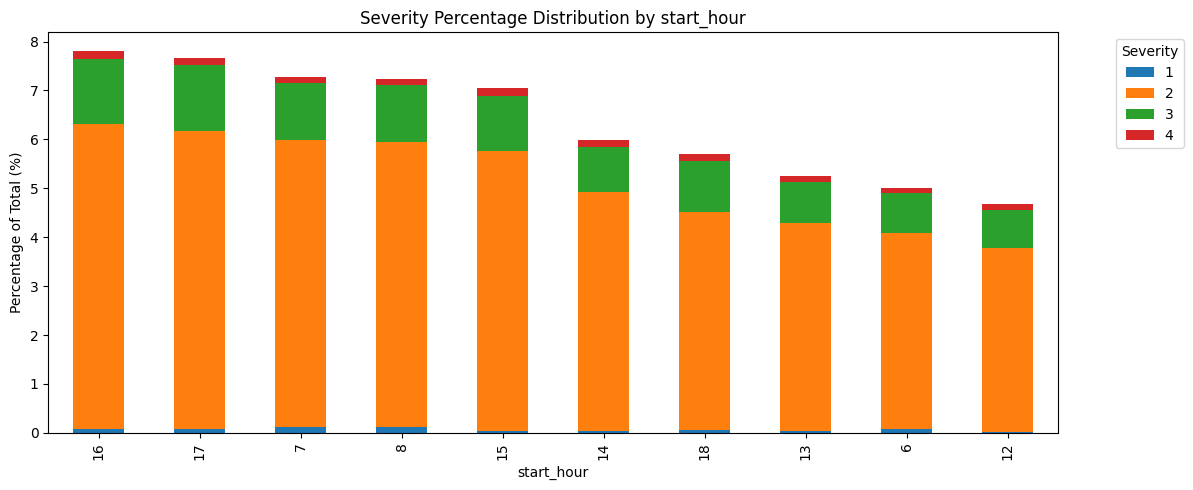


--- is_weekend ---
   is_weekend  severity    Count  Percentage
0       False         1    60667    0.859090
1       False         2  4786089   67.774608
2       False         3   943356   13.358628
3       False         4   139636    1.977350
4        True         1     4511    0.063879


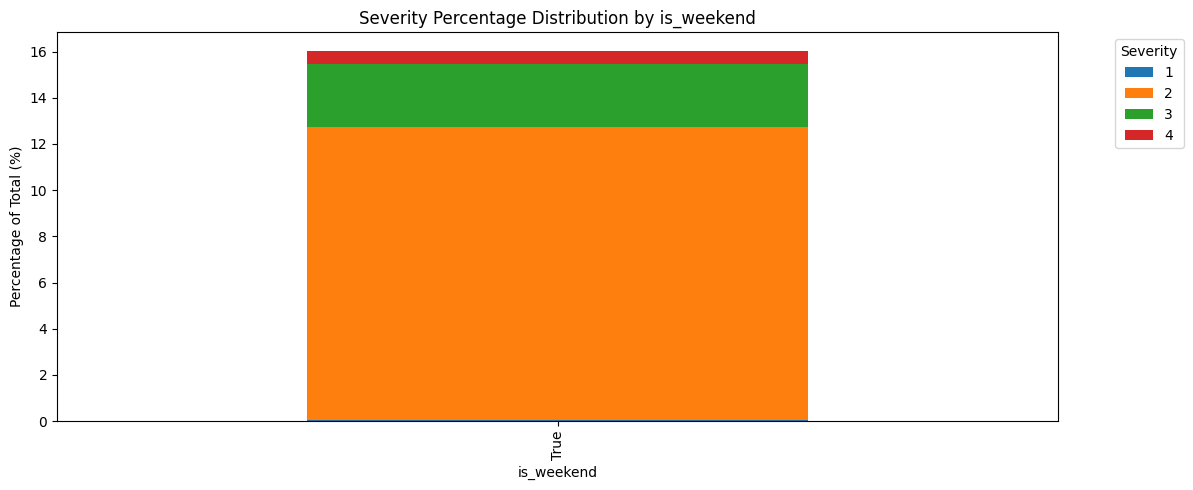


--- severity ---


---------------------------------------------------------------------------
ValueError                                Traceback (most recent call last)
~/.ipykernel/3509/command-7060276983859182-1898272640 in ?()
      7         severity_counts = (
      8             df_USA
      9             .groupby([col, 'severity'])
     10             .size()
---> 11             .reset_index(name='Count')
     12         )
     13 
     14         severity_counts['Percentage'] = (

/databricks/python/lib/python3.12/site-packages/pandas/core/series.py in ?(self, level, drop, name, inplace, allow_duplicates)
   1766                 else:
   1767                     name = self.name
   1768 
   1769             df = self.to_frame(name)
-> 1770             return df.reset_index(
   1771                 level=level, drop=drop, allow_duplicates=allow_duplicates
   1772             )
   1773         return None

/databricks/python/lib/python3.12/site-packages/pandas/core/frame.py in ?(self, level, drop

In [0]:
print("\nPercentage Distribution of Severity for Categorical Variables:\n")

for col in categorical_cols_of_interest:
    if col in df_USA.columns:
        print(f"\n--- {col} ---")

        severity_counts = (
            df_USA
            .groupby([col, 'severity'])
            .size()
            .reset_index(name='Count')
        )

        severity_counts['Percentage'] = (
            severity_counts['Count'] / len(df_USA) * 100
        )

        print(severity_counts.head())

        # Pivot the table for stacked bar chart
        pivot_df = severity_counts.pivot(
            index=col,
            columns='severity',
            values='Percentage'
        ).fillna(0)

        # Limit to the top 10 by total percentage
        top10 = pivot_df.sum(axis=1).nlargest(10).index
        top10_df = pivot_df.loc[top10]

        # Plot the stacked bar chart
        top10_df.plot(
            kind='bar',
            stacked=True,
            figsize=(12, 5)
        )

        plt.title(f"Severity Percentage Distribution by {col}")
        plt.ylabel("Percentage of Total (%)")
        plt.xlabel(col)
        plt.legend(
            title="Severity",
            bbox_to_anchor=(1.05, 1),
            loc='upper left'
        )
        plt.tight_layout()
        plt.show()


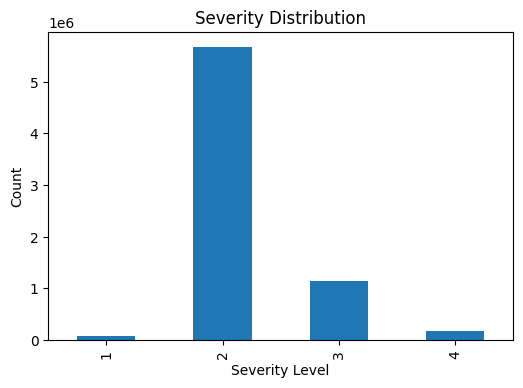

In [0]:
plt.figure(figsize=(6,4))
df_USA['severity'].value_counts().sort_index().plot(kind='bar')
plt.title("Severity Distribution")
plt.xlabel("Severity Level")
plt.ylabel("Count")
plt.show()
